In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

from scipy.stats import shapiro, levene, mannwhitneyu
from scipy.stats import ttest_ind, norm, chi2_contingency

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Ejercicio
•	Fase 1: Exploración y Limpieza
1.	Exploración Inicial:
-   Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas   relevantes.
-   Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
-   Une los dos conjuntos de datos de la forma más eficiente.

In [25]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [26]:
# cargamos todos los conjuntos de datos: 
dfa = pd.read_csv("Customer Flight Activity.csv", index_col = 0)
dfa.head(1)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0


In [27]:
dlh = pd.read_csv("Customer Loyalty History.csv", index_col = 0)
dlh.head(1)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN


In [28]:
# Cargamos nuevamente dfa con la columna Loyalty Number como indice, asi haremos la unión con éste numero de identificación del cliente que coincide en los conjuntos de datos.
dfa.head(1)


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0


In [29]:
# Cargamos dlh con indice Loyalty Number, visualizamos las primeras filas:
dlh = pd.read_csv("Customer Loyalty History.csv", index_col = "Loyalty Number")
dlh.head(1)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN


In [30]:
# Cargamos dfa con indice Loyalty Number, visualizamos las primeras filas:
dfa = pd.read_csv("Customer Flight Activity.csv",  index_col ="Loyalty Number")
dfa.head(1)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0


Revisamos el numero de filas y columnas para cada conjunto de datos y el detalle de sus columnas

In [31]:
dfa.shape

(405624, 9)

In [32]:
dlh.shape

(16737, 15)

In [33]:
dlh.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [34]:
dfa.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [35]:
# Fusionar los DataFrames mediante el índice 'Loyalty Number'
df= pd.merge(dlh, dfa, left_index=True, right_index=True)
df.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

Iniciamos el analisis

In [36]:
# utilizamos reset_index para restablecer el índice del  DataFrame. Aplicamos inplace=True, asi los cambios se aplicarán directamente al DataFrame df 
df.reset_index(inplace=True)
df.head(1)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0


In [37]:
# revisamos las columnas df
df.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [38]:
# vision inicial de las tres primeras columnas
df.head(3)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2018,10,6,4,10,3110,311.0,385,31


In [46]:
# una vez que tengamos nuestro DataFrame preparado con todas las columnas que queremos vamos a crear una función que realice una exploración inicial del conjunto de datos
def eda(dataframe):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    
    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    print(f"el numero de filas y columnas del df son : {df.shape}")
    print("\n ..................... \n")
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    # generamos un DataFrame para tipos de datos
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))

    # principales estadisticos de todas las columnas
    print("\n ..................... \n")

    # estadisticos columnas numericas
    print(f"estadisticos columnas numericas")
    display(df.describe().T)
    print("\n ..................... \n")

    # estadisticos columnas categoricas
    print(f"estadisticos columnas categoricas")
    display(df.describe(include = "O").T)
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    


In [47]:
eda(df)

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

el numero de filas y columnas del df son : (405624, 25)

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.312112
Cancellation Year,87.657535
Cancellation Month,87.657535



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



 ..................... 

estadisticos columnas numericas


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Cancellation Year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00



 ..................... 

estadisticos columnas categoricas


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,Country
Canada,405624


La columna PROVINCE tiene las siguientes valore únicos:


,Province
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna CITY tiene las siguientes valore únicos:


,City
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna POSTAL CODE tiene las siguientes valore únicos:


,Postal Code
V6E 3D9,21984
V5R 1W3,16608
V6T 1Y8,14040
V6E 3Z3,13200
M2M 7K8,12936


La columna GENDER tiene las siguientes valore únicos:


,Gender
Female,203640
Male,201984


La columna EDUCATION tiene las siguientes valore únicos:


,Education
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna MARITAL STATUS tiene las siguientes valore únicos:


,Marital Status
Married,235800
Single,108648
Divorced,61176


La columna LOYALTY CARD tiene las siguientes valore únicos:


,Loyalty Card
Star,184224
Nova,137568
Aurora,83832


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,Enrollment Type
Standard,382200
2018 Promotion,23424


In [22]:
# En una primera revisión encontramos que solo tres columnas tienen datos  nulos, con altos porcentajes y salario tiene valores negativos por lo que revisaremos esta columna con mas detalle. 
df_sorted = df.sort_values(by='Salary')
df_sorted['Salary']


23074    -58486.0
23085    -58486.0
23084    -58486.0
23083    -58486.0
23082    -58486.0
           ...   
405595        NaN
405596        NaN
405597        NaN
405598        NaN
405599        NaN
Name: Salary, Length: 405624, dtype: float64

De las observaciones iniciales, aquí están las acciones a tomar:
1.	Eliminar la columna "country": todos los valores de esta columna son "Canada", no aporta información útil y puede eliminarse del DataFrame.
2.	Revisar la columna "salary": tiene un alto porcentaje de valores negativos y nulos, es importante investigar más a fondo que hacer éstos valores. Es decir dependiendo del análisis a realizar tomaremos decisiones,
3.	Tratar las columnas "cancellation_year" y "cancellation_month": 
Tienen un alto porcentaje de valores nulos, se pueden considerar utilizar técnicas avanzadas de imputación para mantener la información que potencialmente podría ser útil para problemas específicos de la empresa.
4.	Modificar los tipos de datos: Para las columnas donde se pueden realizar operaciones numéricas,  es necesario convertir los datos a tipo float si aún no lo están. Además "year" a tipo que en principio lo dejaré en las unidades que se encuentra.
5. Unificaremos los string tanto columnas como valores a minusculas y en los espacios guion bajo.


# Cleaning

In [48]:
# vamos a cambiar el formato de las columnas, utilizando una lista_comprension. for col in df.columns: Itera sobre cada columna en el DataFrame df y realiza lo siguiente:
# col.lower(): Convierte el nombre de la columna a minúsculas.
# .replace(" ", "_"): Reemplaza cualquier espacio en blanco en el nombre de la columna con un guion bajo "_".
columnas = [col.lower().replace(" ", "_") for col in df.columns]
df.columns = columnas
df.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0


In [49]:
def limpiar_columna(columna):
    """
    Convierte los valores de una columna a minúsculas y reemplaza los espacios con '_'.
    
    Parámetros:
    - columna: La columna que se desea limpiar.
    
    Retorna:
    - La columna limpia.
    """
    # Convertir a minúsculas y reemplazar espacios con '_'
    columna = columna.str.lower().str.replace(' ', '_')
    return columna


In [55]:
# borramos la country
df.drop(['country'], axis=1, inplace=True)

In [56]:
# Lista de columnas que deseas limpiar
columnas_por_cambiar = ['province', 'city', 'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card', "enrollment_type"]

In [57]:
# Aplicar la función a las columnas seleccionadas, mediante el metodo apply que puede usarse tanto para filas como para columnas
df[columnas_por_cambiar] = df[columnas_por_cambiar].apply(limpiar_columna)

In [59]:
df.head(2)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100018,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0


In [65]:
# Creamos una lista con las columnas que queremos convertir a float
columnas_a_convertir = ['dollar_cost_points_redeemed', 'distance', 'points_redeemed']

In [60]:
def convertir_tipos_de_datos(df, columnas):
    """
    Esta función convierte las columnas especificadas del DataFrame df en tipo de datos float.
    
    Args:
    - df: DataFrame pandas que contiene las columnas a ser convertidas.
    - columnas: Lista de nombres de columnas que se convertirán en tipo de datos float.
    
    Returns:
    - df: DataFrame pandas con las columnas especificadas convertidas en tipo de datos float.
    """
    for columna in columnas:
        df[columna] = df[columna].astype(float)
    return df

In [63]:

df = convertir_tipos_de_datos(df, columnas_a_convertir)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   province                     405624 non-null  object 
 2   city                         405624 non-null  object 
 3   postal_code                  405624 non-null  object 
 4   gender                       405624 non-null  object 
 5   education                    405624 non-null  object 
 6   salary                       302952 non-null  float64
 7   marital_status               405624 non-null  object 
 8   loyalty_card                 405624 non-null  object 
 9   clv                          405624 non-null  float64
 10  enrollment_type              405624 non-null  object 
 11  enrollment_year              405624 non-null  int64  
 12  enrollment_month             405624 non-null  int64  
 13 

In [66]:
#  la columna salarios tiene valores negativos calculo el porcentaje de negativos.
negatives_count = df[df['salary'] < 0]['salary'].count()
porc_negatives_count = negatives_count/df.shape[0]*100
porc_negatives_count

0.11833619312466717

In [67]:
negatives_count = df[df['salary'] < 0]['salary'].count()
negatives_count

480

In [69]:
# consideramos que el salario se ha introducido por error con signo negativo asi que lo corregimos.
df["salary"] = abs(df["salary"])

In [70]:
# revisamos los valores modificados
df["salary"].describe()

count    302952.000000
mean      79381.440228
std       34735.904533
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: salary, dtype: float64

In [71]:
# borramos duplicados son el 0.46% de los datos 
df.drop_duplicates(inplace=True)

In [72]:
# Revisamos filas columnas
df.shape

(403760, 24)

Podemos imputar los datos de las columnas: cancellation_year', 'cancellation_month'

In [ ]:
# importamos librerias
from sklearn.impute import KNNImputer

# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Seleccionar las columnas para imputar
cols_to_impute = ['cancellation_year', 'cancellation_month']

# Imputar valores nulos usando KNN
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

Fase 2: Visualización: 
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [73]:
# Agrupar los datos por año y mes, y sumar la cantidad de vuelos reservados en cada grupo
vuelos_por_anio_mes = df.groupby(['year', 'month'])['flights_booked'].sum()
# Crear un nuevo DataFrame con los resultados
vuelos_df = vuelos_por_anio_mes.reset_index()
vuelos_df

,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [74]:
# Filtrar el DataFrame original para el año 2017
df_2017 = df[df['year'] == 2017]

# Calcular la suma de vuelos reservados por mes para el año 2017
vuelos_por_mes_2017 = df_2017.groupby('month')['flights_booked'].sum()

# Crear un nuevo DataFrame para el año 2017
df_2017_resultado = vuelos_por_mes_2017.reset_index()
print("\nDataFrame para el año 2017:")
df_2017_resultado


DataFrame para el año 2017:


,month,flights_booked
0,1,47766
1,2,47691
2,3,64271
3,4,55720
4,5,65279
5,6,80493
6,7,89288
7,8,78692
8,9,63304
9,10,60351


In [75]:

# Filtrar el DataFrame original para el año 2018
df_2018 = df[df['year'] == 2018]
# Calcular la suma de vuelos reservados por mes para el año 2018
vuelos_por_mes_2018 = df_2018.groupby('month')['flights_booked'].sum()
# Crear un nuevo DataFrame para el año 2018
df_2018_resultado = vuelos_por_mes_2018.reset_index()
# Mostrar los resultados
print("\nDataFrame para el año 2018:")
df_2018_resultado


DataFrame para el año 2018:


,month,flights_booked
0,1,49170
1,2,48643
2,3,66928
3,4,56791
4,5,76891
5,6,92749
6,7,104143
7,8,90512
8,9,73075
9,10,69110


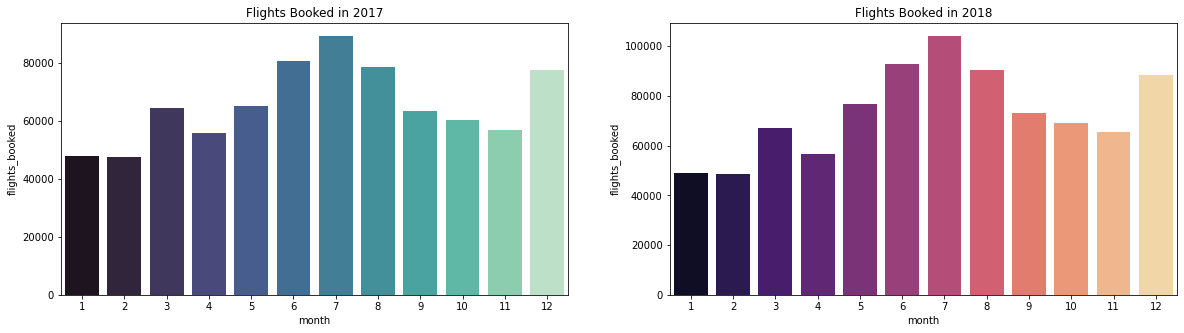

In [76]:
# Establecemos nuestra gráfica con un subplots  indicando el número de filas y columnas que queremos, lo que equivale a la matriz de espacios para crear graficas.
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Con Seaborn  usaremos el parámetro 'ax' indicamos la posición de la grafica

sns.barplot(x = "month",
            y = "flights_booked", 
            data = df_2017_resultado, 
            ax = axes[0], 
            palette= "mako")
axes[0].set_title('Flights Booked in 2017')

# hacemos lo mismo para el violinplot
sns.barplot(x = "month", 
               y = "flights_booked", 
               data = df_2018_resultado, 
               ax = axes[1], 
               palette = "magma")
axes[1].set_title('Flights Booked in 2018');

Text(0.5, 1.0, 'Comparativo Cantidad de Vuelos Reservados 2017 vs 2018')

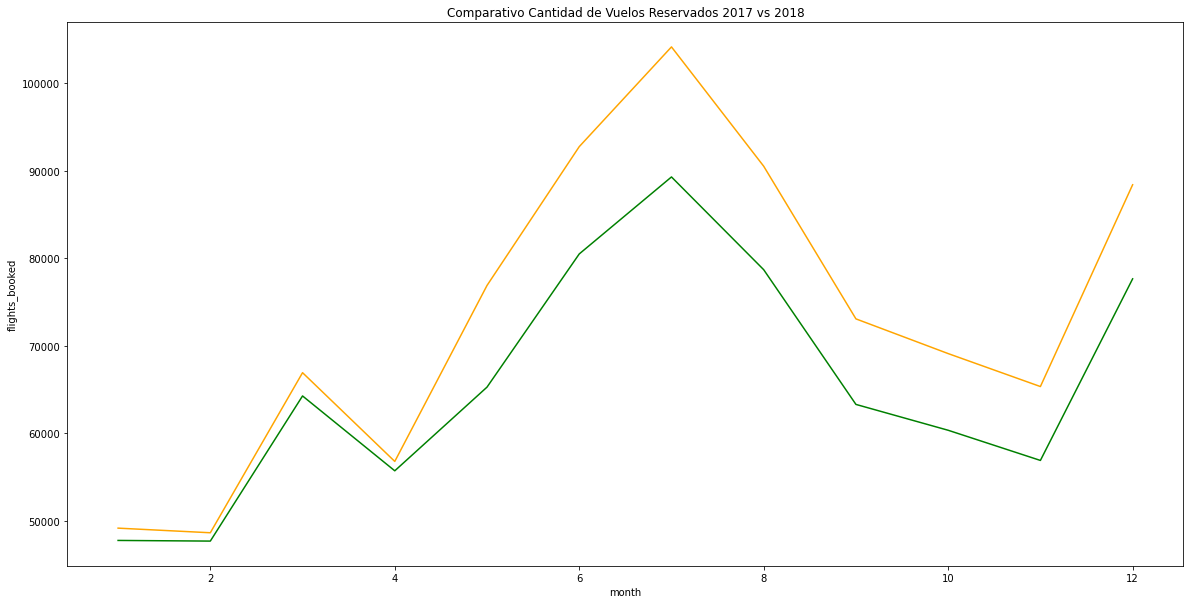

In [84]:
# Este código utiliza las bibliotecas Matplotlib y Seaborn para crear un gráfico de líneas que compara el número de vuelos reservados en dos años diferentes (2017 y 2018).
plt.figure(figsize=(20, 10))
sns.lineplot(x=df_2017_resultado["month"], y=df_2017_resultado["flights_booked"], color = "green")
sns.lineplot(x=df_2018_resultado["month"], y=df_2018_resultado["flights_booked"], color = "orange");
plt.title('Comparativo Cantidad de Vuelos Reservados 2017 vs 2018')

Se observan incrementos significativos en la cantidad de vuelos reservados durante los períodos vacacionales de mitad y final de año. Es importante destacar que el comportamiento de los vuelos por año muestra una tendencia similar, lo que sugiere una estacionalidad consistente en la demanda de vuelos a lo largo del tiempo. Sin embargo, para el año 2018, se observa un crecimiento en el número de vuelos  a partir del 4 mes en comparación con el año anterior. Para obtener un análisis más detallado, sería útil trazar una gráfica que indique el crecimiento porcentual a lo largo de los años, lo cual podríamos realizar en los next step de nuestro análisis.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

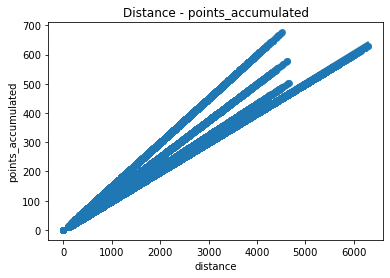

In [78]:
# Es una gráfica que se utiliza para trazar un gráfico de dispersión (*scatter plot*) junto con una línea de regresión lineal que se ajusta a los datos. Esta línea de regresión lineal muestra la tendencia general de la relación entre dos variables y puede ayudar a identificar patrones o tendencias en los datos. 
# visualizamoms la relacion entre las columnas distance y points_accumulated. Analizamos para el df de inicio
sns.regplot(x = 'distance', 
y = 'points_accumulated', 
data = df)
plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("Distance - points_accumulated");

En este primer grafico podriamos estar viendo lineas para cada año por lo que graficamos por cada año por separado con el mismo tipo de grafica

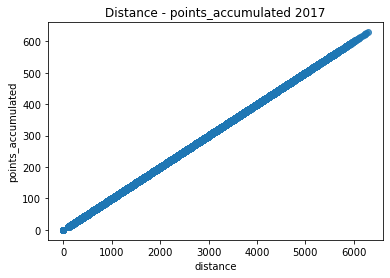

In [85]:
# Graficamos con df para el año 2017
sns.regplot(x = 'distance', 
y = 'points_accumulated', 
data = df_2017)
plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("Distance - points_accumulated 2017");

 Para el año 2017 observamos una linea sin outliers  o puntos que se desvíen significativamente de la línea de regresión, esto significaría que, en general, a medida que la distancia de los vuelos aumenta, los puntos acumulados también aumentan de manera constante.

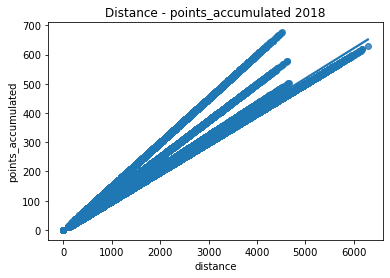

In [86]:
# Graficamos para el año 2018
sns.regplot(x = 'distance', 
y = 'points_accumulated', 
data = df_2018)
plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("Distance - points_accumulated 2018");

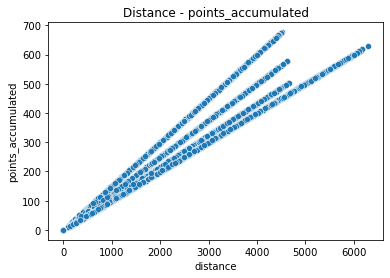

In [87]:

sns.scatterplot(x = 'distance', 
y = 'points_accumulated', 
data = df_2018)
plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("Distance - points_accumulated 2018");

Para investigar más a fondo estas observaciones, propondré . En primer lugar, tomaré un registro unico sin criterio en la elección de la cantidad de puntos acumulados de cada cliente y realizaré una visualización, posteriormente crearé una función que tome solo el valor con mayor cantidad de números acumulados por  cliente en lugar de todos los registros. Esto nos permitirá visualizar si hay algún cambio significativo en la gráfica al considerar diferentes criterios. Es importante tener en cuenta que, si bien es posible que algunos clientes han consumido parte o la totalidad de sus puntos, intentaremos examinar cómo se comportan los datos bajo estas suposiciones.

In [92]:
#  borramos los duplicados para el primer criterio
unique_customers_loyalty = df_2018.drop_duplicates(subset=['loyalty_number'])

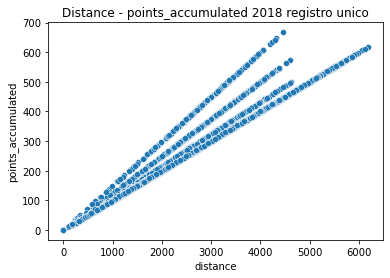

In [95]:
#  realizamos la grafica con el df que tiene un registro por cliente resultado de borrar los duplicados
sns.scatterplot(x = 'distance', 
y = 'points_accumulated', 
data = unique_customers_loyalty)
plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("Distance - points_accumulated 2018 registro unico");

In [96]:
def filtrar_y_obtener_maximo(df):
    """
    Esta función agrupa el DataFrame df por 'loyalty_number' y luego selecciona la fila con el mayor 
    valor de 'points_accumulated' dentro de cada grupo.
    
    Args:
    - df: DataFrame pandas que contiene las columnas 'loyalty_number' y 'points_accumulated'.
    
    Returns:
    - DataFrame pandas con una fila por cada 'loyalty_number', seleccionando la fila con el mayor 
    valor de 'points_accumulated' dentro de cada grupo.
    """
    # Agrupar por 'loyalty_number' y encontrar el índice correspondiente al máximo valor de 'points_accumulated' en cada grupo
    max_points_indices = df.groupby('loyalty_number')['points_accumulated'].idxmax()
    
    # Seleccionar las filas correspondientes a los índices encontrados
    result_df = df.loc[max_points_indices]
    
    return result_df

In [97]:
# aplicamos la funcion para obtener el valor unico de cliente que tiene mas puntos acumulados
df_max = filtrar_y_obtener_maximo(df)

In [98]:
numero =df_max['loyalty_number'].unique()

print(f"cantidad de valores unicos:  {len(numero)}")


cantidad de valores unicos:  16737


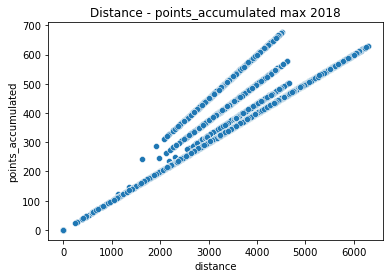

In [100]:
# Realizamos la grafica con cada cliente y el valor maximo de puntos acumulados
sns.scatterplot(x = 'distance', 
y = 'points_accumulated', 
data = df_max)
plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("Distance - points_accumulated max 2018");

De manera visual parece que esta condición no esta afectando el resultado. Como he dicho podemos utilizar otro tipo de pruebas para esta variable o considerar algunas otras como las que he mencionado con anterioridad.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [102]:
# lo calculamos en el punto anterior de un dataframe filtrado pero debe darnos el mismo resultado.  
numero =df['loyalty_number'].unique()
print(f"cantidad de valores unicos:  {len(numero)}")

cantidad de valores unicos:  16737


In [103]:
# Filtramos valores únicos de 'loyalty_number' y seleccionar la columna 'province', para ello borramos los duplicados
unique_customers_by_province = df.drop_duplicates(subset=['loyalty_number'])[['loyalty_number', 'province']]
unique_customers_by_province.shape

(16737, 2)

In [104]:
# Hacemos el groupby por 'province' y contamos el número de clientes únicos en cada provincia
customers_per_province = unique_customers_by_province.groupby('province').count()
df_customers_per_province = customers_per_province.reset_index()
df_customers_per_province

,province,loyalty_number
0,alberta,969
1,british_columbia,4409
2,manitoba,658
3,new_brunswick,636
4,newfoundland,258
5,nova_scotia,518
6,ontario,5404
7,prince_edward_island,66
8,quebec,3300
9,saskatchewan,409


Text(0.5, 1.0, 'Distribución de clientes por provincia')

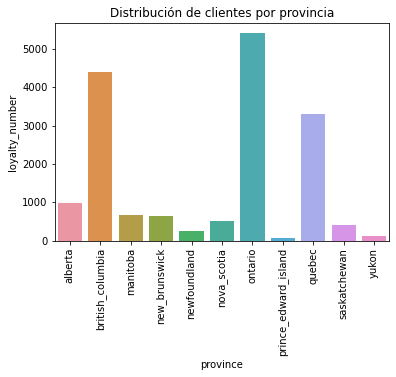

In [107]:
# Graficamos con un diagrama de barras en el eje x las provincias y en el eje y la frecuencia de los clientes. Rotamos el eje de los valores del eje x
sns.barplot(x='province', y='loyalty_number', data=df_customers_per_province)
plt.xticks(rotation = 90)
plt.title("Distribución de clientes por provincia")

Podemos observar que Ontario, British Columbia y Quebec son las provincias que presentan una mayor cantidad de clientes en comparación con el resto. Estas tres provincias destacan claramente por encima de las demás en términos de cantidad de clientes registrados. Por otro lado, las provincias de Prince Edward Island y Yukon muestran la menor cantidad de clientes. Esta disparidad en la cantidad de clientes entre las diferentes provincias podría ser el resultado de una variedad de factores, como por ejemplo la densidad de población, la actividad económica y la accesibilidad a los servicios de la compañía aérea en cada región. Estos hallazgos resaltan la importancia de considerar las diferencias regionales al desarrollar estrategias de marketing y planificación empresarial para la compañía aérea.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? Recordamos que la columna salary tiene nulos.Veamos su distribución


In [108]:
# revisamos los principales estadisticos
df["salary"].describe()

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Distribución de salarios')

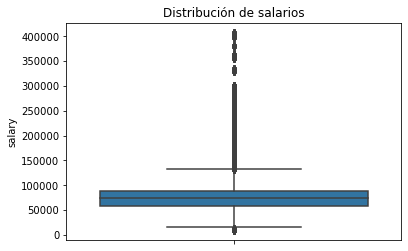

In [109]:
# Realizamos una primera visualización del comportamiento de los salarios.
sns.boxplot(y = 'salary',data = df);
plt.title("Distribución de salarios")

En este primer análisis, la presencia de valores atípicos en la gráfica de salarios es notable y esperable, ya que la distribución de los salarios puede variar significativamente entre y dentro de distintas categorías o grupos dentro del conjunto de datos. Además, la alta proporción de valores nulos en la columna de salarios puede influir en la distribución y en la identificación de estos valores atípicos. Por lo tanto, es crucial determinar cómo abordar los valores nulos antes de continuar con el análisis.

In [111]:
# Creamos un nuevo DataFrame con las filas donde 'salary' es nulo 
df_nulos_salary = df[df['salary'].isnull()]
# Muestra las primeras filas del nuevo DataFrame
df_nulos_salary["education"].value_counts()

college    102260
Name: education, dtype: int64

In [112]:
# visualizamos el df creado
df_nulos_salary.head(5)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
24,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,1,10,4,14,2030.0,203.0,0.0,0.0
25,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,2,0,0,0,0.0,0.0,0.0,0.0
26,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,4,9,0,9,648.0,64.0,0.0,0.0
27,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,5,0,0,0,0.0,0.0,0.0,0.0
28,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,6,0,0,0,0.0,0.0,0.0,0.0


Nuestra base de datos incluye las categorías high_school_or_below, bachelor, master, college y doctor dentro de la variable educación. Es llamativo que la categoría college concentre el total de los valores nulos y no cuente con ningún valor. Dado que estamos llevando a cabo nuestro análisis en Canadá, investigué los niveles educativos específicos en este país para obtener una comprensión más clara de los datos.

High School representa la educación básica, seguida por el college, que ofrece programas de educación postsecundaria más prácticos y orientados al empleo. Los programas de bachelor en universidades proporcionan una educación más amplia y académica en un campo específico, y conducen a la obtención de un título de licenciatura. Los títulos más altos son master y doctorado.

En principio, entiendo que los salarios de college se acercan más a los de high school, pero para confirmarlo con más detalle, podríamos obtener información adicional de diversas fuentes, como estadísticas gubernamentales, informes de la industria o encuestas salariales. Esto podría proporcionar una visión más detallada de la distribución de los salarios para la categoría educativa de college en particular. Sin embargo, este proceso podría llevar más tiempo.

Es importante destacar que los salarios asociados con el nivel educativo college tienden a estar más cerca de los salarios de high school, y existe una diferencia de aproximadamente del 15% en nuestra base de datos entre los salarios de high school y los de bachelor.

Tenemos varias opciones para manejar los valores nulos en la categoría de college. Podríamos basarnos en estadísticas disponibles como el caso de las gubernamentales; establecer una media ponderada entre high school y bachelor, o utilizar métodos como KNN (vecinos más cercanos). En principio, si necesitamos utilizar esta variable para realizar otras preguntas además de analizar la distribución del salario, podríamos considerar la mediana ponderada. Sin embargo, dejaría este cálculo como un paso adicional, ya que hay una amplia variedad de salarios dentro de cada categoría.

En principio, llevaré a cabo el análisis sin contar con esta categoría, pero seguiré explorando opciones para imputar los valores nulos de manera adecuada en caso de que necesitemos incluir la categoría de college en análisis posteriores.

In [113]:
# Filtrar las filas donde 'salary' no es nulo y además 
df_no_nulos_salary = df[df['salary'].notnull()]

# Mostrar las primeras filas del nuevo DataFrame
df_no_nulos_salary.shape

(301500, 24)

In [114]:
# visualizamos los principales estadistico
df_no_nulos_salary.describe()

,loyalty_number,salary,clv,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
count,301500.000000,301500.000000,301500.000000,301500.000000,301500.000000,36995.000000,36995.000000,301500.000000,301500.000000,301500.000000,301500.000000,301500.000000,301500.000000,301500.000000,301500.000000,301500.000000
mean,550077.110541,79371.732902,8128.648642,2015.245267,6.667380,2016.481227,6.987242,2017.500405,6.501367,4.121944,1.032494,5.154438,1212.509682,124.105737,30.640511,2.479917
std,260208.520213,34726.433958,6959.390845,1.985206,3.386025,1.384228,3.494990,0.500001,3.451976,5.224587,2.076083,6.518297,1434.416257,146.775445,125.339145,10.138069
min,100018.000000,9081.000000,2119.890000,2012.000000,1.000000,2013.000000,1.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,325490.000000,59262.000000,4087.510000,2014.000000,4.000000,2016.000000,4.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551391.000000,73479.000000,5810.630000,2015.000000,7.000000,2017.000000,7.000000,2018.000000,7.000000,1.000000,0.000000,1.000000,511.000000,52.000000,0.000000,0.000000
75%,773943.000000,88606.000000,9075.770000,2017.000000,10.000000,2018.000000,10.000000,2018.000000,10.000000,8.000000,1.000000,10.000000,2340.000000,239.000000,0.000000,0.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


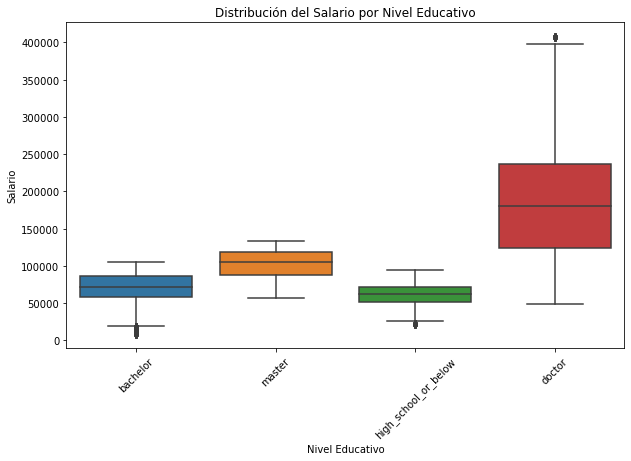

In [115]:

# Creamos un gráfico de boxplot para visualizar la distribución del salario por nivel educativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='salary', data=df_no_nulos_salary)
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario')
plt.title('Distribución del Salario por Nivel Educativo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


In [120]:
# Calcular el salario promedio por nivel educativo
salary_mean_educacion = df_no_nulos_salary.groupby('education')['salary'].mean().reset_index()
salary_mean_educacion.sort_values(by='salary', ascending=True)

,education,salary
2,high_school_or_below,61146.378165
0,bachelor,72599.080913
3,master,103734.523724
1,doctor,178403.675202


In [123]:
# Función para calcular la diferencia de salarios y su porcentaje
def calcular_porcentaje(row):
    diff = row.diff()
    perc = (diff / row.shift(1)) * 100
    return diff, perc

In [125]:
# Aplicar la función a cada fila
diff_perc =salary_mean_educacion["salary"].apply(calcular_porcentaje("salary"), axis=1)
# Mostrar los resultados
diff_perc

AttributeError: 'str' object has no attribute 'diff'

In [ ]:
salary_mean_educacion["salary_perc"] = salary_mean_educacion

In [117]:
salario_promedio_por_educacion = df_no_nulos_salary.groupby('education')['salary'].describe()
salario_promedio_por_educacion

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
bachelor,252567.0,72599.080913,16667.675569,9081.0,58711.0,71972.0,85866.0,105563.0
doctor,17731.0,178403.675202,70380.054033,48109.0,124407.0,180440.0,236612.0,407228.0
high_school_or_below,18915.0,61146.378165,12105.350590,21853.0,52054.0,61806.0,71344.0,93875.0
master,12287.0,103734.523724,17518.492270,56414.0,88120.0,105487.0,118530.0,133080.0


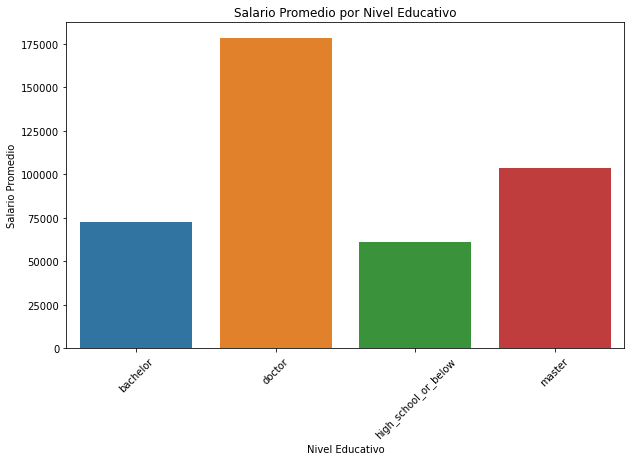

In [118]:
# Calcular el salario promedio por nivel educativo
salario_promedio_por_educacion = df_no_nulos_salary.groupby('education')['salary'].mean().reset_index()

# Crear un gráfico de barras para comparar el salario promedio entre los diferentes niveles educativos
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='salary', data=salario_promedio_por_educacion)
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

high_school_or_below	61.146.378.165	-0,157752724
bachelor	72.599.080.913	-0,300145426
master	103.734.523.724	-0,418540433
doctor	178.403.675.202	


Observams los salarios mas altos en los niveles educativos de doctor y master. En cuanto al salario de college podemos investigar con mas detalle con estadisticos de canada, he encontrado información que me indica que los salarios de college se parecen mas a los de hight school, pero claro intervienen tambien otros factores como el sector y la experiencia lo cual esta reflejado en los rangos que existen entre los salarios. En este momento no cuento con una muestra de estos salarios con lo que tendria que hacer una investigación adicional.Puedo hacerlo con mas detalle y mas cercana a la realidad pero es una investigación que requiere mas tiempo desarrollarla.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [48]:
df_proporcion = df_max.groupby('loyalty_card')["loyalty_number"].count().reset_index()

In [50]:
df_proporcion

,loyalty_card,loyalty_number
0,aurora,3429
1,nova,5671
2,star,7637


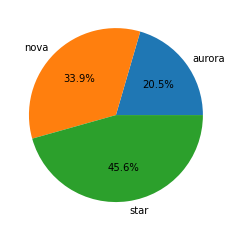

In [49]:
plt.pie("loyalty_number", labels= "loyalty_card",data = df_proporcion, autopct=  '%1.1f%%');

La tarjeta de fidelidad Star es la más popular entre los clientes, siendo utilizada por el 45% de ellos, seguida de cerca por la tarjeta Nova, preferida por el 33.9% de los clientes. La tarjeta Aurora, con un 20.5% de adopción, es la opción menos común entre los clientes.

6. ¿Cómo se distribuyen los clientes según su estado civil y género

In [52]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df_max['marital_status'], df_max['gender'])

# Mostrar la tabla de contingencia
tabla_contingencia


gender,female,male
marital_status,,
divorced,1269,1249
married,4869,4866
single,2272,2212


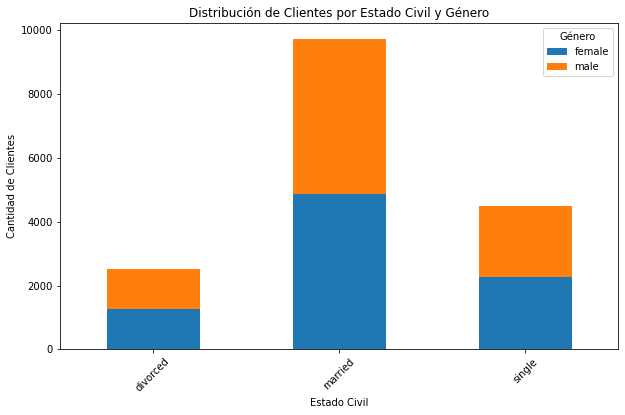

In [53]:
# Crear un gráfico de barras apiladas
tabla_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.legend(title='Género')

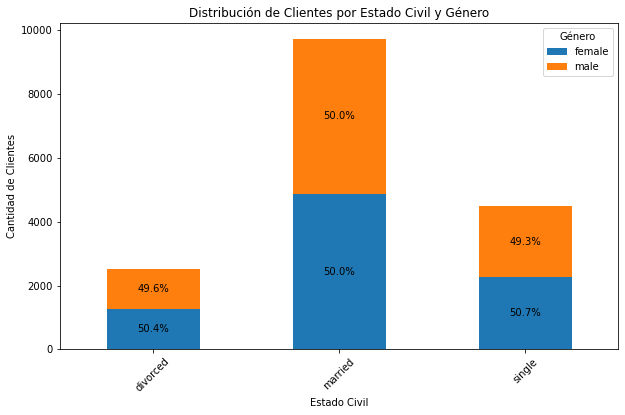

In [54]:


# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))

# Obtener el total de clientes por categoría de estado civil
totals = tabla_contingencia.sum(axis=1)

# Agregar los porcentajes dentro de cada barra
for bar in ax.containers:
    ax.bar_label(bar, labels=[f"{h/total*100:.1f}%" for h, total in zip(bar.datavalues, totals)], label_type='center')

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.legend(title='Género')
plt.show()


Ambos generos tienen distribuciones parecidas en cada estado civil.

Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:


1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [60]:
df_flights_education = df[['flights_booked', 'education']]
df_flights_education


,flights_booked,education
0,3,bachelor
1,2,bachelor
2,6,bachelor
3,4,bachelor
4,0,bachelor
...,...,...
405619,15,bachelor
405620,0,bachelor
405621,6,bachelor
405622,11,bachelor


2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo.


In [78]:
df_pie = df.groupby('education')["flights_booked"].count().reset_index()

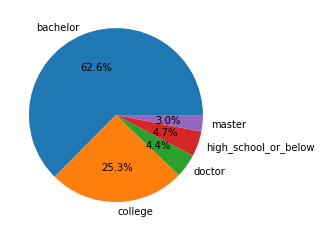

In [79]:
plt.pie("flights_booked", labels= "education",data = df_pie, autopct=  '%1.1f%%');

In [85]:
df_flights_education.shape

(403760, 2)

In [76]:
df_e_f = df_flights_education.groupby("education")['flights_booked'].describe()
df_e_f.reset_index()


,education,count,mean,std,min,25%,50%,75%,max
0,bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
1,college,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
2,doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
3,high_school_or_below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
4,master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


Para todos los niveles educativos en presentan resultados similares en sus estadisticas descriptivas

3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos.

Creamos dos grupos de nivel de estudios para plantear nuestras hipotesis:
Secondary_College = ["high_school_or_below", "College"]
advanced_education = ["bachelor","doctor", "master"]

Hipótesis nula (H0): No hay diferencia significativa e entre los vuelos de los grupos de educación basica y avanzada  "Secondary_College" y "advanced_education".

Hipótesis alternativa (H1): Existe una diferencia significativa entre los vuelos de los grupos de educación basica y avanzada  "Secondary_College" y "advanced_education".


In [80]:
# una vez que tengamos nuestro DataFrame preparado con todas las columnas que queremos vamos a crear una función que no haga una exploración inicial del conjunto de datos
def exploracion_dataframe(dataframe, columna_control):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    - columna_control (str): El nombre de la columna que se utilizará como control para dividir el DataFrame.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    # como estamos en un problema de A/B testing y lo que realmente nos importa es comparar entre el grupo de control y el de test, los principales estadísticos los vamos a sacar de cada una de las categorías
    
    for categoria in dataframe[columna_control].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

Aunque hemos filtrado el dataframe para trabajar con las dos columnas, utilizaré el dataframe inicial por si interesan otras columnas como next step, realizamos la exploración de los principales estadisticos de la columna de control que en este caso es educacion

In [86]:
# llamamos a la función de exploración
exploracion_dataframe(df, "education")

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
salary,25.326927
cancellation_year,87.703091
cancellation_month,87.703091



 ..................... 

Los tipos de las columnas son:


,tipo_dato
loyalty_number,int64
province,object
city,object
postal_code,object
gender,object
education,object
salary,float64
marital_status,object
loyalty_card,object
clv,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROVINCE tiene las siguientes valore únicos:


,province
ontario,130258
british_columbia,106442
quebec,79573
alberta,23360
manitoba,15900


La columna CITY tiene las siguientes valore únicos:


,city
toronto,80775
vancouver,62314
montreal,49687
winnipeg,15900
whistler,13994


La columna POSTAL_CODE tiene las siguientes valore únicos:


,postal_code
v6e_3d9,21944
v5r_1w3,16529
v6t_1y8,13994
v6e_3z3,13128
m2m_7k8,12855


La columna GENDER tiene las siguientes valore únicos:


,gender
female,202757
male,201003


La columna EDUCATION tiene las siguientes valore únicos:


,education
bachelor,252567
college,102260
high_school_or_below,18915
doctor,17731
master,12287


La columna MARITAL_STATUS tiene las siguientes valore únicos:


,marital_status
married,234845
single,108153
divorced,60762


La columna LOYALTY_CARD tiene las siguientes valore únicos:


,loyalty_card
star,183745
nova,136883
aurora,83132


La columna ENROLLMENT_TYPE tiene las siguientes valore únicos:


,enrollment_type
standard,380419
2018_promotion,23341



 ..................... 

Los principales estadísticos de las columnas categóricas para el BACHELOR son: 


,count,unique,top,freq
province,252567,11,ontario,80817
city,252567,29,toronto,50931
postal_code,252567,54,v6e_3d9,13906
gender,252567,2,female,127302
education,252567,1,bachelor,252567
marital_status,252567,3,married,171506
loyalty_card,252567,3,star,108148
enrollment_type,252567,2,standard,237369



 ..................... 

Los principales estadísticos de las columnas numéricas para el BACHELOR son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,252567.0,548114.325134,260447.229088,100018.00,323011.50,548037.00,772484.00,999986.00
salary,252567.0,72599.080913,16667.675569,9081.00,58711.00,71972.00,85866.00,105563.00
clv,252567.0,8211.231866,7058.364835,2255.31,4142.56,5866.42,9080.64,83325.38
enrollment_year,252567.0,2015.261016,1.989055,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,252567.0,6.647032,3.380208,1.00,4.00,7.00,10.00,12.00
cancellation_year,30899.0,2016.487621,1.385779,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,30899.0,7.049969,3.464143,1.00,4.00,7.00,10.00,12.00
year,252567.0,2017.500370,0.500001,2017.00,2017.00,2018.00,2018.00,2018.00
month,252567.0,6.501043,3.451966,1.00,4.00,7.00,10.00,12.00
flights_booked,252567.0,4.110288,5.221671,0.00,0.00,1.00,8.00,21.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el COLLEGE son: 


,count,unique,top,freq
province,102260,11,ontario,33480
city,102260,29,toronto,20224
postal_code,102260,55,v6e_3d9,5734
gender,102260,2,male,51898
education,102260,1,college,102260
marital_status,102260,3,single,58527
loyalty_card,102260,3,star,50863
enrollment_type,102260,2,standard,96541



 ..................... 

Los principales estadísticos de las columnas numéricas para el COLLEGE son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,102260.0,549280.619010,255249.759603,100102.00,330053.00,547699.00,764980.00,999982.00
salary,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clv,102260.0,7584.627706,6555.084078,1898.01,3747.06,5568.95,8500.12,74228.52
enrollment_year,102260.0,2015.266781,1.962211,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,102260.0,6.668072,3.436317,1.00,4.00,7.00,10.00,12.00
cancellation_year,12655.0,2016.571948,1.367285,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,12655.0,6.888582,3.331803,1.00,4.00,7.00,10.00,12.00
year,102260.0,2017.500196,0.500002,2017.00,2017.00,2018.00,2018.00,2018.00
month,102260.0,6.501242,3.452016,1.00,4.00,7.00,10.00,12.00
flights_booked,102260.0,4.169744,5.246040,0.00,0.00,1.00,8.00,21.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el MASTER son: 


,count,unique,top,freq
province,12287,11,ontario,4108
city,12287,29,toronto,2476
postal_code,12287,53,v6e_3d9,672
gender,12287,2,female,6432
education,12287,1,master,12287
marital_status,12287,3,married,5035
loyalty_card,12287,3,star,6692
enrollment_type,12287,2,standard,11831



 ..................... 

Los principales estadísticos de las columnas numéricas para el MASTER son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,12287.0,549248.162448,264145.849788,100644.00,316746.50,549064.00,781463.00,998072.00
salary,12287.0,103734.523724,17518.492270,56414.00,88120.00,105487.00,118530.00,133080.00
clv,12287.0,7494.386544,5903.160539,2174.11,3600.93,5140.39,10083.49,30591.61
enrollment_year,12287.0,2015.238056,1.944088,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,12287.0,6.821681,3.388708,1.00,4.00,7.00,10.00,12.00
cancellation_year,1560.0,2016.723077,1.353581,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,1560.0,6.338462,3.652417,1.00,3.00,7.00,10.00,12.00
year,12287.0,2017.500692,0.500020,2017.00,2017.00,2018.00,2018.00,2018.00
month,12287.0,6.502157,3.452259,1.00,4.00,7.00,10.00,12.00
flights_booked,12287.0,4.200700,5.213956,0.00,0.00,1.00,8.00,21.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el HIGH_SCHOOL_OR_BELOW son: 


,count,unique,top,freq
province,18915,11,ontario,6233
city,18915,29,toronto,3835
postal_code,18915,54,v5r_1w3,910
gender,18915,2,female,9696
education,18915,1,high_school_or_below,18915
marital_status,18915,3,married,12505
loyalty_card,18915,3,star,9620
enrollment_type,18915,2,standard,17715



 ..................... 

Los principales estadísticos de las columnas numéricas para el HIGH_SCHOOL_OR_BELOW son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,18915.0,557841.598784,258899.087562,101148.00,331325.00,561092.0,782804.00,994541.0
salary,18915.0,61146.378165,12105.350590,21853.00,52054.00,61806.0,71344.00,93875.0
clv,18915.0,7731.270379,6658.365908,2272.34,3707.28,5274.2,8991.98,43290.5
enrollment_year,18915.0,2015.197145,1.982687,2012.00,2014.00,2015.0,2017.00,2018.0
enrollment_month,18915.0,6.613904,3.451742,1.00,4.00,7.0,10.00,12.0
cancellation_year,2232.0,2016.301075,1.382103,2013.00,2015.00,2017.0,2017.00,2018.0
cancellation_month,2232.0,6.559140,3.755301,1.00,3.00,7.0,10.00,12.0
year,18915.0,2017.500502,0.500013,2017.00,2017.00,2018.0,2018.00,2018.0
month,18915.0,6.503569,3.452150,1.00,4.00,7.0,10.00,12.0
flights_booked,18915.0,4.176209,5.239267,0.00,0.00,1.0,8.00,21.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el DOCTOR son: 


,count,unique,top,freq
province,17731,11,ontario,5620
city,17731,29,toronto,3309
postal_code,17731,55,v6e_3z3,867
gender,17731,2,female,8965
education,17731,1,doctor,17731
marital_status,17731,3,married,11174
loyalty_card,17731,3,star,8422
enrollment_type,17731,2,standard,16963



 ..................... 

Los principales estadísticos de las columnas numéricas para el DOCTOR son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,17731.0,570327.226834,254389.869544,101594.00,355994.00,581380.00,788292.00,999911.00
salary,17731.0,178403.675202,70380.054033,48109.00,124407.00,180440.00,236612.00,407228.00
clv,17731.0,7815.738556,6467.049620,2119.89,4046.94,5623.31,8583.27,58207.13
enrollment_year,17731.0,2015.077266,1.952483,2012.00,2013.00,2015.00,2017.00,2018.00
enrollment_month,17731.0,6.907337,3.384204,1.00,4.00,7.00,10.00,12.00
cancellation_year,2304.0,2016.406250,1.358742,2013.00,2015.00,2016.50,2018.00,2018.00
cancellation_month,2304.0,7.000000,3.464854,1.00,4.00,7.00,10.00,12.00
year,17731.0,2017.500592,0.500014,2017.00,2017.00,2018.00,2018.00,2018.00
month,17731.0,6.503074,3.452037,1.00,4.00,7.00,10.00,12.00
flights_booked,17731.0,4.175512,5.256971,0.00,0.00,1.00,8.00,21.00


In [123]:
# Seleccionamos todas las filas del DataFrame education donde el valor en la columna "education" sea "high_school_or_below" y "college
df_secondary_college_education = df[df["education"].isin(["high_school_or_below", "college"])]
df_secondary_college_education.shape


(121175, 24)

In [127]:
df_secondary_college_education["education"].value_counts()

college                 102260
high_school_or_below     18915
Name: education, dtype: int64

In [130]:
# Seleccionamos todas las filas del DataFrame education donde el valor en la columna "education" sea "bachelor","doctor" y "master"
df_advanced_education = df[df["education"].isin(["bachelor","doctor", "master"])]
df_advanced_education.shape

(282585, 24)

In [131]:
df_advanced_education["education"].value_counts()

bachelor    252567
doctor       17731
master       12287
Name: education, dtype: int64

In [135]:
s_c_mean =df_secondary_college_education['flights_booked'].mean()
a_e_mean = df_advanced_education['flights_booked'].mean()

print(f"Media de vuelos en educación secundaria y college: {s_c_mean}")
print(f"Media de vuelos en educacion avanzada : {a_e_mean}")

Media de vuelos en educación secundaria y college: 4.170753043119455
Media de vuelos en educacion avanzada : 4.118311304563229


In [139]:
df_secondary_college_education["control"] = "secondary_college"
df_advanced_education["control"] = "advanced_education"


In [144]:
df_secondary_college_education["control"].unique()

array(['secondary_college'], dtype=object)

In [146]:
df_advanced_education["control"].unique()

array(['advanced_education'], dtype=object)

In [147]:
df_control = pd.concat([df_secondary_college_education, df_advanced_education], ignore_index=True)
df_control.shape

(403760, 25)

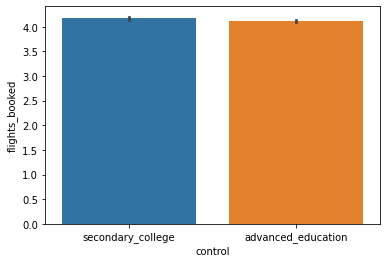

In [141]:
sns.barplot(data = df_control, y = "flights_booked", x = "control");

In [148]:
_,p_value = shapiro(df_control["flights_booked"])
print(f"p-Value: {p_value}")

p-Value: 0.0


- H0: Datos normales
- H1: NO normales

p_value < 0.05 rechazamos H0 --> datos no son normales asi que continuamos con otro metodo

In [149]:
statistic, p_value = mannwhitneyu(df_secondary_college_education["flights_booked"], df_advanced_education["flights_booked"])

# Imprimir los resultados
print("Estadístico de la prueba de Mann-Whitney U:", statistic)
print("Valor p:", p_value)

Estadístico de la prueba de Mann-Whitney U: 17216065553.0
Valor p: 0.002942081262120518


p_value < 0.05 rechazamos H0

Si el valor p (p-value) es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos.

Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa entre los vuelos de los grupos de educación basica y avanzada  "Secondary_College" y "advanced_education".